### 학습목표
- 키워드: 음식물 쓰레기 처리기
- 다양한 제품 조사를 위하여 지식인, 카페, 블로드 등 데이터를 수집하여 분석할 수 있다.
- 리뷰데이터 수집 후 전처리를 통해 워드클라우드를 생성할 수 있다.
- 기간설정을 통하여 최근 6개월 이내의 데이터를 수집할 수 있다.

In [1]:
# 라이브러리 불러오기
import selenium.webdriver as wb
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from tqdm import tqdm
import pandas as pd
import re # 정규표현식

# 문자열 전처리 함수 -> 숫자, 문자, (?.!,¿) 제외하고 공백으로 대체
def preprocess_sentence_kr(w):
  w = w.strip()
  w = re.sub(r"[^0-9가-힣?.!,¿]+", " ", w) 
  w = w.strip() 
  return w

### 실습
1. 네이버 메인페이지 요청
2. "음식물 처리기" 검색
3. 지식인 탭으로 이동 -> 지식인 탭 클릭!
4. 기간설정을 통하여 6개월 이내의 데이터만 노출

In [4]:
driver = wb.Chrome()
driver.get('https://www.naver.com')

In [6]:
driver.find_element(By.ID, 'query').send_keys('음식물 처리기' + '\n')

- #lnb > div.lnb_group > div > div.lnb_nav_area._nav_area_root > div > div.api_flicking_wrap._conveyer_root > div:nth-child(4) > a
- #lnb > div.lnb_group > div > div.lnb_nav_area._nav_area_root > div > div.api_flicking_wrap._conveyer_root > div:nth-child(5) > a
- #lnb > div.lnb_group > div > div.lnb_nav_area._nav_area_root > div > div.api_flicking_wrap._conveyer_root > div:nth-child(6) > a

In [12]:
# #lnb > div.lnb_group > div > div.lnb_nav_area._nav_area_root > div > div.api_flicking_wrap._conveyer_root > div:nth-child(5) > a
tab = driver.find_elements(By.CSS_SELECTOR,'a.tab')
tab[4].text

'지식iN'

In [13]:
tab[4].click()

- 기간 설정을 통하여 6개월 이내의 데이터만 노출

In [14]:
# 기간을 포함하는 요소 추출 -> 클릭 (옵션)
driver.find_element(By.CSS_SELECTOR,'a.btn_option._search_option_open_btn').text

'옵션'

In [16]:
# 페이지에서 명확하게 하나의 요소를 추출하고자할때 -> (요소 우클릭 -> copy -> copy selector)
option = driver.find_element(By.CSS_SELECTOR, '#snb > div.mod_group_option_filter._search_option_simple_wrap > div > div.option_filter > a')
option.click()

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=144.0.7559.60); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#elementnotinteractableexception
Stacktrace:
Symbols not available. Dumping unresolved backtrace:
	0x7ff7280c5715
	0x7ff7280c5770
	0x7ff727e70e76
	0x7ff727ecd994
	0x7ff727ebefc6
	0x7ff727ef598a
	0x7ff727ebe846
	0x7ff727f19e45
	0x7ff727ebcc28
	0x7ff727ebdb33
	0x7ff7283ae9f0
	0x7ff7283a8ded
	0x7ff7283c969a
	0x7ff7280e11e5
	0x7ff7280e99cc
	0x7ff7280cebf4
	0x7ff7280ceda6
	0x7ff7280b4e87
	0x7ff9c7fc7374
	0x7ff9c927cc91


In [17]:
# 6개월 클릭하기
month = driver.find_element(By.CSS_SELECTOR,'#snb > div.mod_group_option_sort._search_option_detail_wrap > ul > li.bx.term > div > div.option > a:nth-child(7)')


- 스크롤 내리기
  - 더 많은 데이터를 수집하기 위함

In [29]:
# 요소.send_keys()
# 스크롤을 내리기 위해서 (전체화면(body)에 END 키 전송)
for i in range(10):
    body = driver.find_element(By.TAG_NAME,'body')
    body.send_keys(Keys.END)
    time.sleep(1)

- 지식인 페이지에 노출되어있는 게시글의 url 수집

In [32]:
# 순수한 url 을 href_list 담기!
# 요소.get_attribute('속성명')
aTag = driver.find_elements(By.CSS_SELECTOR,'a.fender-ui_228e3bd1._F4b_iMlsFBN3anLCC2o')
aTag[0].get_attribute('href')
# 리스트에 담기
href_list = [a.get_attribute('href')  for a in aTag]
href_list

['https://kin.naver.com/qna/detail.naver?d1id=8&dirId=802&docId=490510354&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyymOumrOq4sA%3D%3D',
 'https://kin.naver.com/qna/detail.naver?d1id=8&dirId=802&docId=491046605&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyymOumrOq4sA%3D%3D',
 'https://kin.naver.com/qna/detail.naver?d1id=8&dirId=80101&docId=413811604&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyymOumrOq4sA%3D%3D',
 'https://kin.naver.com/qna/detail.naver?d1id=8&dirId=80201&docId=490688527&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyymOumrOq4sA%3D%3D',
 'https://kin.naver.com/qna/detail.naver?d1id=5&dirId=50503&docId=491234500&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyymOumrOq4sA%3D%3D',
 'https://kin.naver.com/qna/detail.naver?d1id=3&dirId=31501&docId=489794339&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyymOumrOq4sA%3D%3D',
 'https://kin.naver.com/qna/detail.naver?d1id=5&dirId=50104&docId=490729449&enc=utf8&kinsrch_src=pc_tab_kin&qb=7J2M7Iud66y8IOyym

- 1번째 링크의 본문 수집하기

In [33]:
driver = wb.Chrome()
driver.get(href_list[0])
time.sleep(2)

In [37]:
# 답변 더보기 버튼 클릭하여 모든 답변 확인
try:
    driver.find_element(By.ID,'nextPageButton').click()
except:
    pass

In [39]:
result = driver.find_elements(By.CSS_SELECTOR,'div.se-main-container')

In [42]:
result[2].text

'음식물 처리기는 이미 100년전에 정답을 찾았습니다\n디스포저는 한번설치로 10년이상 추가비용, AS 발생 없이 사용가능합니다\n막힘원인이있다고 하는데 음식물이 아닌 일반 쓰러기를 갈아서 발생한 문제입니다\n막힘 원인이 있으면 전세계 미국 중국 필리핀 베트남 이런데서 가장많이 선호할까요? 우리나라에도 사용한지 15년 되었는데 문제없이 AS없이 수명이 다해 재설치한 가정이 문제일으킨 가정보다 90프로이상 많습니다  거의 완벽한 검증이 된것입니다'

- 링크를 반복하여 전체 본문 수집하기

In [48]:
driver = wb.Chrome()
f = open('./data/네이버 지식인 리뷰데이터.txt','w')

# 링크 반복
for i in tqdm(range(len(href_list))):
    driver.get(href_list[i])
    time.sleep(2)

    try:
        driver.find_element(By.ID,'nextPageButton').click()
    except:
        pass

    result = driver.find_elements(By.CSS_SELECTOR,'div.se-main-container')

    for j in range(len(result)):
        content = preprocess_sentence_kr(result[j].text)
        f.write(content)
f.close()

100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [05:50<00:00,  3.19s/it]


In [46]:
preprocess_sentence_kr(result[0].text)

'내집 마련을 진심으로 축하드리며 음식물처리기는 삶의 질을 수직 상승시켜주는 최고의 선택인 만큼 렌탈을 고려하고 계신다면 매달 지출되는 고정 비용과 필터 교체비 걱정 없이 반영구적으로 편리하게 쓸 수 있는 다센 음식물처리기를 살펴보시길 권장해 드립니다. 렌탈 방식은 관리 면에서 편해 보일 수 있으나 장기적으로는 구매 비용보다 훨씬 많은 지출이 발생하고 특히 필터형 제품은 냄새 역류나 교체 번거로움이 뒤따르는데 다센은 필터 자체가 필요 없는 분쇄형 시스템이라 월 전기료 천 원 수준의 압도적인 경제성을 자랑하며 환경부 공식 인증을 받은 합법 제품이라 새집의 배관을 안전하게 지키면서도 음쓰 봉투 없는 완벽한 일상을 만들어 줍니다. 싱크대에서 페달만 밟으면 이십초 만에 모든 음식물이 즉시 처리되어 주방 위생을 완벽하게 유지할 수 있고 전문 엔지니어가 직접 방문하여 꼼꼼한 설치와 사후 관리까지 보장하니 아래 링크에서 실제 설치 사례와 사용자 만족도를 직접 확인해 보시고 현명한 선택 하시길 바랍니다. 다센 베이직클린 가정용 분쇄 싱크대 음식물처리기 고속 몰 고속 몰 좋은 제품을 합리적인 가격에 소비자와 함께 할 수 있도록 항상 노력하겠습니다. . .'

### 워드클라우드 생성하기!
- 수집된 텍스트데이터로 워드클라우드 만들기
- 키위라이브러리를 활용하여 토큰화
- 빈도수 상위 100개 단어를 활용하여 생성

1. 데이터 불러오기 (text)
2. 라이브러리 불러오기 (키위라브러리, 워드클라우드, 시각화라이브러리(matplotlib)
3. 키위객체생성 -> 토큰화 (token)
4. 일반명사(NNG), 고유명사(NNP) 리스트에 담기 (nn_list)  -> 조건문 사용시 리스트 안으로 넣어주기 ['NNG','NNP']
5. 빈도수 측정, 상위 100개 데이터를 저장 (top_100)
6. 워드클라우드 그리기~

In [2]:
# 텍스트 파일 열기
f = open('./data/네이버 지식인 리뷰데이터.txt','r') 
text = f.readline()
f.close()
text

'내집 마련을 진심으로 축하드리며 음식물처리기는 삶의 질을 수직 상승시켜주는 최고의 선택인 만큼 렌탈을 고려하고 계신다면 매달 지출되는 고정 비용과 필터 교체비 걱정 없이 반영구적으로 편리하게 쓸 수 있는 다센 음식물처리기를 살펴보시길 권장해 드립니다. 렌탈 방식은 관리 면에서 편해 보일 수 있으나 장기적으로는 구매 비용보다 훨씬 많은 지출이 발생하고 특히 필터형 제품은 냄새 역류나 교체 번거로움이 뒤따르는데 다센은 필터 자체가 필요 없는 분쇄형 시스템이라 월 전기료 천 원 수준의 압도적인 경제성을 자랑하며 환경부 공식 인증을 받은 합법 제품이라 새집의 배관을 안전하게 지키면서도 음쓰 봉투 없는 완벽한 일상을 만들어 줍니다. 싱크대에서 페달만 밟으면 이십초 만에 모든 음식물이 즉시 처리되어 주방 위생을 완벽하게 유지할 수 있고 전문 엔지니어가 직접 방문하여 꼼꼼한 설치와 사후 관리까지 보장하니 아래 링크에서 실제 설치 사례와 사용자 만족도를 직접 확인해 보시고 현명한 선택 하시길 바랍니다. 다센 베이직클린 가정용 분쇄 싱크대 음식물처리기 고속 몰 고속 몰 좋은 제품을 합리적인 가격에 소비자와 함께 할 수 있도록 항상 노력하겠습니다. . .음식물처리기는 잔고장 없어야 합니다 잔고장이 있는지 실제 써보신분들 후기글들 참고 많이 해보세요 그리고 만약 고장이 나더라도 잘 되는지도 확인하세요음식물 처리기는 이미 100년전에 정답을 찾았습니다 디스포저는 한번설치로 10년이상 추가비용, 발생 없이 사용가능합니다 막힘원인이있다고 하는데 음식물이 아닌 일반 쓰러기를 갈아서 발생한 문제입니다 막힘 원인이 있으면 전세계 미국 중국 필리핀 베트남 이런데서 가장많이 선호할까요? 우리나라에도 사용한지 15년 되었는데 문제없이 없이 수명이 다해 재설치한 가정이 문제일으킨 가정보다 90프로이상 많습니다 거의 완벽한 검증이 된것입니다이 포스팅은 네이버 쇼핑 커넥트 활동의 일환으로, 판매 발생 시 수수료를 제공받습니다. 쿠쿠 건조분쇄형 에코웨일 음식물처리기 요즘 인기 많은 진짜 이유 오늘의 

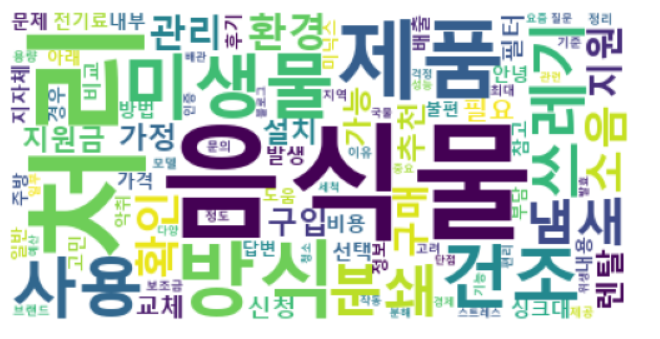

### 워드클라우드

In [3]:
# 형태소 분석기
from kiwipiepy import Kiwi
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# mask 이미지를 만들기 위한 도구
from PIL import Image
import numpy as np

In [5]:
# 키위 객체생성
kiwi = Kiwi()

In [6]:
# 토큰화
token = kiwi.tokenize(text)

In [8]:
token
# form: 토큰화 결과
# tag : 품사
# NNP: 고유명사, NNG: 일반명사

[Token(form='나', tag='NP', start=0, len=1),
 Token(form='의', tag='JKG', start=0, len=1),
 Token(form='집', tag='NNG', start=1, len=1),
 Token(form='마련', tag='NNG', start=3, len=2),
 Token(form='을', tag='JKO', start=5, len=1),
 Token(form='진심', tag='NNG', start=7, len=2),
 Token(form='으로', tag='JKB', start=9, len=2),
 Token(form='축하', tag='NNG', start=12, len=2),
 Token(form='드리', tag='VV', start=14, len=2),
 Token(form='며', tag='EC', start=16, len=1),
 Token(form='음식물', tag='NNG', start=18, len=3),
 Token(form='처리', tag='NNG', start=21, len=2),
 Token(form='기', tag='XSN', start=23, len=1),
 Token(form='는', tag='JX', start=24, len=1),
 Token(form='삶', tag='NNG', start=26, len=1),
 Token(form='의', tag='JKG', start=27, len=1),
 Token(form='질', tag='NNG', start=29, len=1),
 Token(form='을', tag='JKO', start=30, len=1),
 Token(form='수직', tag='NNG', start=32, len=2),
 Token(form='상승', tag='NNG', start=35, len=2),
 Token(form='시키', tag='XSV', start=37, len=2),
 Token(form='어', tag='EC', start=3

In [10]:
# 고유명사, 일반명사 결과만 nn_list에 담기
nn_list= []
for t in token:
    if t.tag in ['NNG','NNP']:
        nn_list.append(t.form)

In [11]:
nn_list

['집',
 '마련',
 '진심',
 '축하',
 '음식물',
 '처리',
 '삶',
 '질',
 '수직',
 '상승',
 '최고',
 '선택',
 '렌탈',
 '고려',
 '지출',
 '고정',
 '비용',
 '필터',
 '교체',
 '비',
 '걱정',
 '반영구',
 '편리',
 '음식물',
 '처리',
 '권장',
 '렌탈',
 '방식',
 '관리',
 '면',
 '장기',
 '구매',
 '비용',
 '지출',
 '발생',
 '필터',
 '제품',
 '냄새',
 '역류',
 '교체',
 '필터',
 '자체',
 '필요',
 '분쇄',
 '시스템',
 '월',
 '전기료',
 '수준',
 '압도',
 '경제',
 '자랑',
 '환경부',
 '공식',
 '인증',
 '합법',
 '제품',
 '집',
 '배관',
 '안전',
 '봉투',
 '완벽',
 '일상',
 '싱크대',
 '페달',
 '음식물',
 '즉시',
 '처리',
 '주방',
 '위생',
 '완벽',
 '유지',
 '전문',
 '엔지니어',
 '방문',
 '설치',
 '사후',
 '관리',
 '보장',
 '아래',
 '링크',
 '실제',
 '설치',
 '사례',
 '사용자',
 '만족도',
 '확인',
 '현명',
 '선택',
 '베이직',
 '클린',
 '가정',
 '분쇄',
 '싱크대',
 '음식물',
 '처리',
 '고속',
 '몰',
 '고속',
 '몰',
 '제품',
 '합리',
 '가격',
 '소비자',
 '노력',
 '음식물',
 '처리',
 '고장',
 '고장',
 '실제',
 '후기',
 '글',
 '참고',
 '만약',
 '고장',
 '확인',
 '음식물',
 '처리',
 '전',
 '정답',
 '디스포저',
 '설치',
 '이상',
 '추가',
 '비용',
 '발생',
 '사용',
 '가능',
 '원인',
 '음식물',
 '일반',
 '쓰러기',
 '발생',
 '문제',
 '원인',
 '세계',
 '미국',
 '중국',
 '필리핀',
 '베트남',
 '선호',
 '나라',


In [13]:
# 상위 top100 빈도수 단어 추출
counter = Counter(nn_list)
top_100 = counter.most_common(100)

In [29]:
# 이미지 열어서 마스크이미지로 변환
# 이미지의 흰색 부분은 단어를 채우지 않고, 그 이외 색이 있는 부분에 단어를 채우는 원리
img = Image.open('./data/han.jpg')
mask_img = np.array(img)

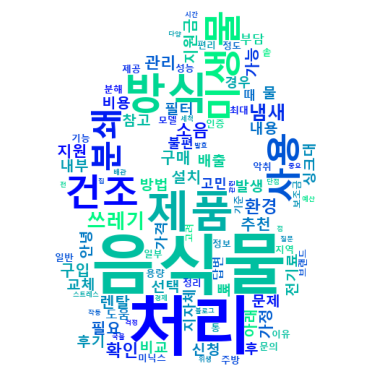

In [30]:
wc = WordCloud(
    font_path='C:/Windows/Fonts/malgunbd.ttf',
    background_color='white' ,
    mask = mask_img,
    colormap= 'winter'
).generate_from_frequencies(dict(top_100))
plt.imshow(wc)
plt.axis('off')
plt.show()